In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.8.2


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
#Określenie ścieżek do plików
folder = '../../Dane/Baza_zdjec_zlaczone_1/'
nazwa_CSV = 'nowe.csv'
folder_aktorzy = '../../Dane/Baza_aktorzy_zlaczone/'
nazwa_aktorzy_CSV = 'aktorzy.csv'
folder_2 = '../../Dane/Baza_zdjec_moje/'
slesh = '/'
png = '.png'

In [5]:
def release_list(a):
    
    del a[:]
    del a

In [6]:
#Wczytanie pliku CSV do tablicy images

with open(folder+nazwa_CSV,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value = []
for i in new[0]:
    value.append(int(i))    
    
print(len(value))

3600


In [7]:
#Wczytanie zdjęć do tablicy images
images = []
size = len(value)

for i in range(size):
    im = Image.open(folder+str(i)+png)
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images.append(arr_im) 
print(len(images))

3600


In [8]:
#Inicjalizacja tablic
rand_list = []
rand_list = np.zeros((len(images)), dtype=np.uint8)

x_test = []
y_test = []

x_train = []
y_train = []


#Okreslanie wielkosci zbiorów
eighty = int(len(images)*80/100)
twenty = len(images) - eighty

#Losowanie zbioru testowego
for i in range(eighty):
    
    #Pierwsze losowanie wartości
    rand = random.randint(0,len(images)-1)
    
    #Sprawdzenie czy wylosowana wartość się powtarza
    while (rand_list[rand] == 1) :
        #Jeżeli tak to ponownie losuje
        rand = random.randint(0,len(images)-1)
    
    #Zapisanie zdjecia i wartości do nowej tablicy
    x_train.append(images[rand])
    y_train.append(value[rand])
    rand_list[rand] = 1

#Losowanie zbioru uczącego
for j in range(twenty):
    
    #Pierwsze losowanie wartości
    rand = random.randint(0,len(images)-1)
    
    #Sprawdzenie czy wylosowana wartość się powtarza
    while (rand_list[rand] == 1) :
        #Jeżeli tak to ponownie losuje
        rand = random.randint(0,len(images)-1)
        
    #Zapisanie zdjecia i wartości do nowej tablicy
    x_test.append(images[rand])
    y_test.append(value[rand])
    rand_list[rand] = 1
    
    
release_list(images)
release_list(value)

In [9]:
#Sprawdzenie poprawności losowania
val_1 = sum(y_test) / 1800
print("%.2f" % val_1 + '%') 


val_2 = sum(y_train) / 1800
print("%.2f" % val_2 + '%') 

0.20%
0.80%


In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

[[0.    0.098 0.051 ... 0.31  0.    0.   ]
 [0.    0.067 0.137 ... 0.337 0.    0.   ]
 [0.373 0.357 0.557 ... 0.349 0.    0.   ]
 ...
 [0.    0.    0.38  ... 0.196 0.196 0.184]
 [0.    0.11  0.4   ... 0.012 0.    0.   ]
 [0.176 0.    0.208 ... 0.    0.    0.   ]]


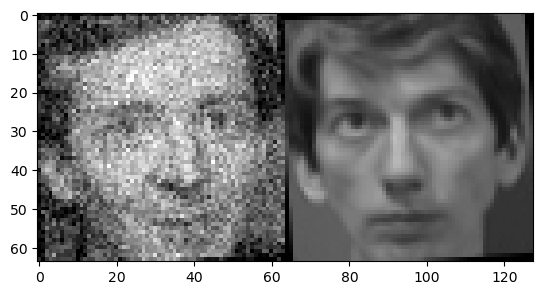

In [11]:
plt.imshow(x_train[0],cmap = 'gray')
print(x_train[0])

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

2022-12-09 19:54:09.945558: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 19:54:09.950851: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 14, 64)       

In [24]:
model.evaluate(x_test,  y_test, verbose=2)

23/23 - 2s - loss: 0.4874 - accuracy: 0.5319 - mse: 0.4874 - 2s/epoch - 97ms/step


[0.4873800453212526, 0.5319444444444444, 0.48738004129112794]

In [22]:
predict_x = model.predict(x_test) 

predictions = (predict_x > 0.5).astype("int32")

In [23]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

tf.math.confusion_matrix(y_test,predictions)

[['Tn' 'Nn']
 ['Np' 'Tp']]


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 35, 329],
       [  8, 348]], dtype=int32)>

In [21]:




#Wczytanie zdjęć aktorów






In [14]:
with open(folder_aktorzy+nazwa_aktorzy_CSV,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()


tmp = []
act_label = []

for i in lines:
    tmp.append(i.split(" "))

    
act_label = []
for i in tmp[0]:
    act_label.append(int(i))    
    
act_label = np.array(act_label)
print(len(act_label))

2052


In [15]:
#Wczytanie zdjęć aktorów do tablicy

act = []
size = len(act_label)

for i in range(size):
    im = Image.open(folder_aktorzy+str(i)+png)
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    act.append(arr_im) 
    
act = np.array(act)
print(len(act))

2052


[[0.984 0.984 0.984 ... 0.192 0.196 0.196]
 [0.984 0.984 0.98  ... 0.2   0.192 0.192]
 [0.984 0.98  0.976 ... 0.204 0.196 0.192]
 ...
 [0.98  0.98  0.98  ... 0.298 0.294 0.29 ]
 [0.98  0.98  0.98  ... 0.294 0.298 0.302]
 [0.98  0.98  0.98  ... 0.298 0.31  0.302]]


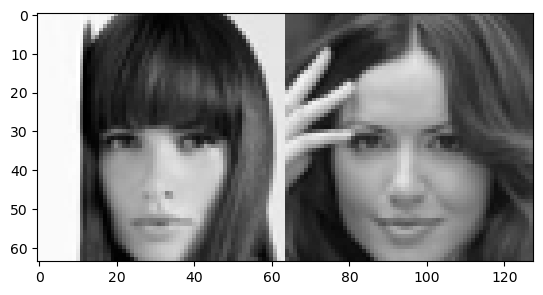

In [16]:
plt.imshow(act[0],cmap = 'gray')
print(act[0])

In [20]:
predict_act = model.predict(act) 

predict = (act_label > 0.5).astype("int32")

In [25]:
print(names)

tf.math.confusion_matrix(act_label,predict)

[['Tn' 'Nn']
 ['Np' 'Tp']]


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1026,    0],
       [   0, 1026]], dtype=int32)>

In [17]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy','mse'])

#Funcka umożliwia zatrzymanie się uczenia 
#gdy wartość strat przstanie maleć
EarlyStop = EarlyStopping(monitor='val_loss', 
                          mode='min', 
                          verbose=1, 
                          patience=5)


#ModelCheck = ModelCheckpoint(filepath='Zlaczone.h5',
#                             monitor='var_loss',
#                             save_best_only=True)


history = model.fit(x=act, 
                    y=act_label, 
                    epochs=10,
                    batch_size=256,
                    validation_split=0.1,
                    callbacks = [EarlyStop]
                   )

Epoch 1/10
8/8 [==============================] - 23s 3s/step - loss: 0.2877 - accuracy: 0.5314 - mse: 0.2877 - val_loss: 0.2945 - val_accuracy: 0.2379 - val_mse: 0.2945
Epoch 2/10
8/8 [==============================] - 20s 3s/step - loss: 0.2248 - accuracy: 0.6381 - mse: 0.2248 - val_loss: 0.5191 - val_accuracy: 0.0922 - val_mse: 0.5191
Epoch 3/10
8/8 [==============================] - 20s 2s/step - loss: 0.2053 - accuracy: 0.6945 - mse: 0.2053 - val_loss: 0.2126 - val_accuracy: 0.5777 - val_mse: 0.2126
Epoch 4/10
8/8 [==============================] - 20s 2s/step - loss: 0.1630 - accuracy: 0.7622 - mse: 0.1630 - val_loss: 0.0822 - val_accuracy: 0.9320 - val_mse: 0.0822
Epoch 5/10
8/8 [==============================] - 20s 2s/step - loss: 0.1375 - accuracy: 0.8272 - mse: 0.1375 - val_loss: 0.2571 - val_accuracy: 0.5631 - val_mse: 0.2571
Epoch 6/10
8/8 [==============================] - 21s 3s/step - loss: 0.1187 - accuracy: 0.8478 - mse: 0.1187 - val_loss: 0.0677 - val_accuracy: 0.946

23/23 - 2s - loss: 0.4874 - accuracy: 0.5319 - mse: 0.4874 - 2s/epoch - 104ms/step


ValueError: too many values to unpack (expected 2)

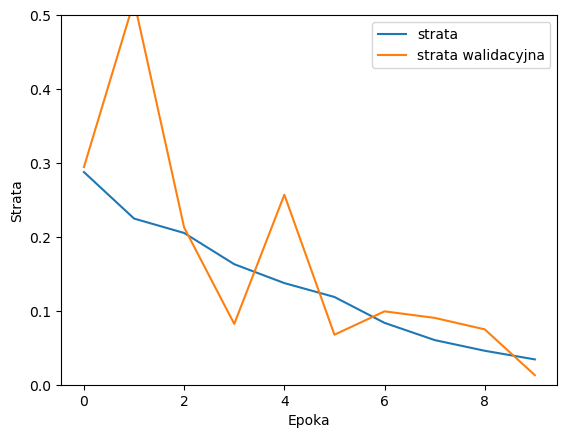

In [18]:
plt.plot(history.history['loss'], label='strata')
plt.plot(history.history['val_loss'], label = 'strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0.0, 0.5])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

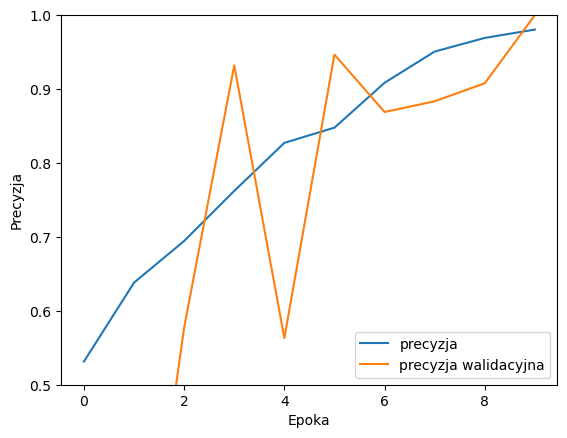

In [19]:
plt.plot(history.history['accuracy'], label='precyzja')
plt.plot(history.history['val_accuracy'], label = 'precyzja walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')